In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Aaryant31/ML_Supervised_learning-Practice/main/Tree%20Based%20Method/rock_density_xray.csv")

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

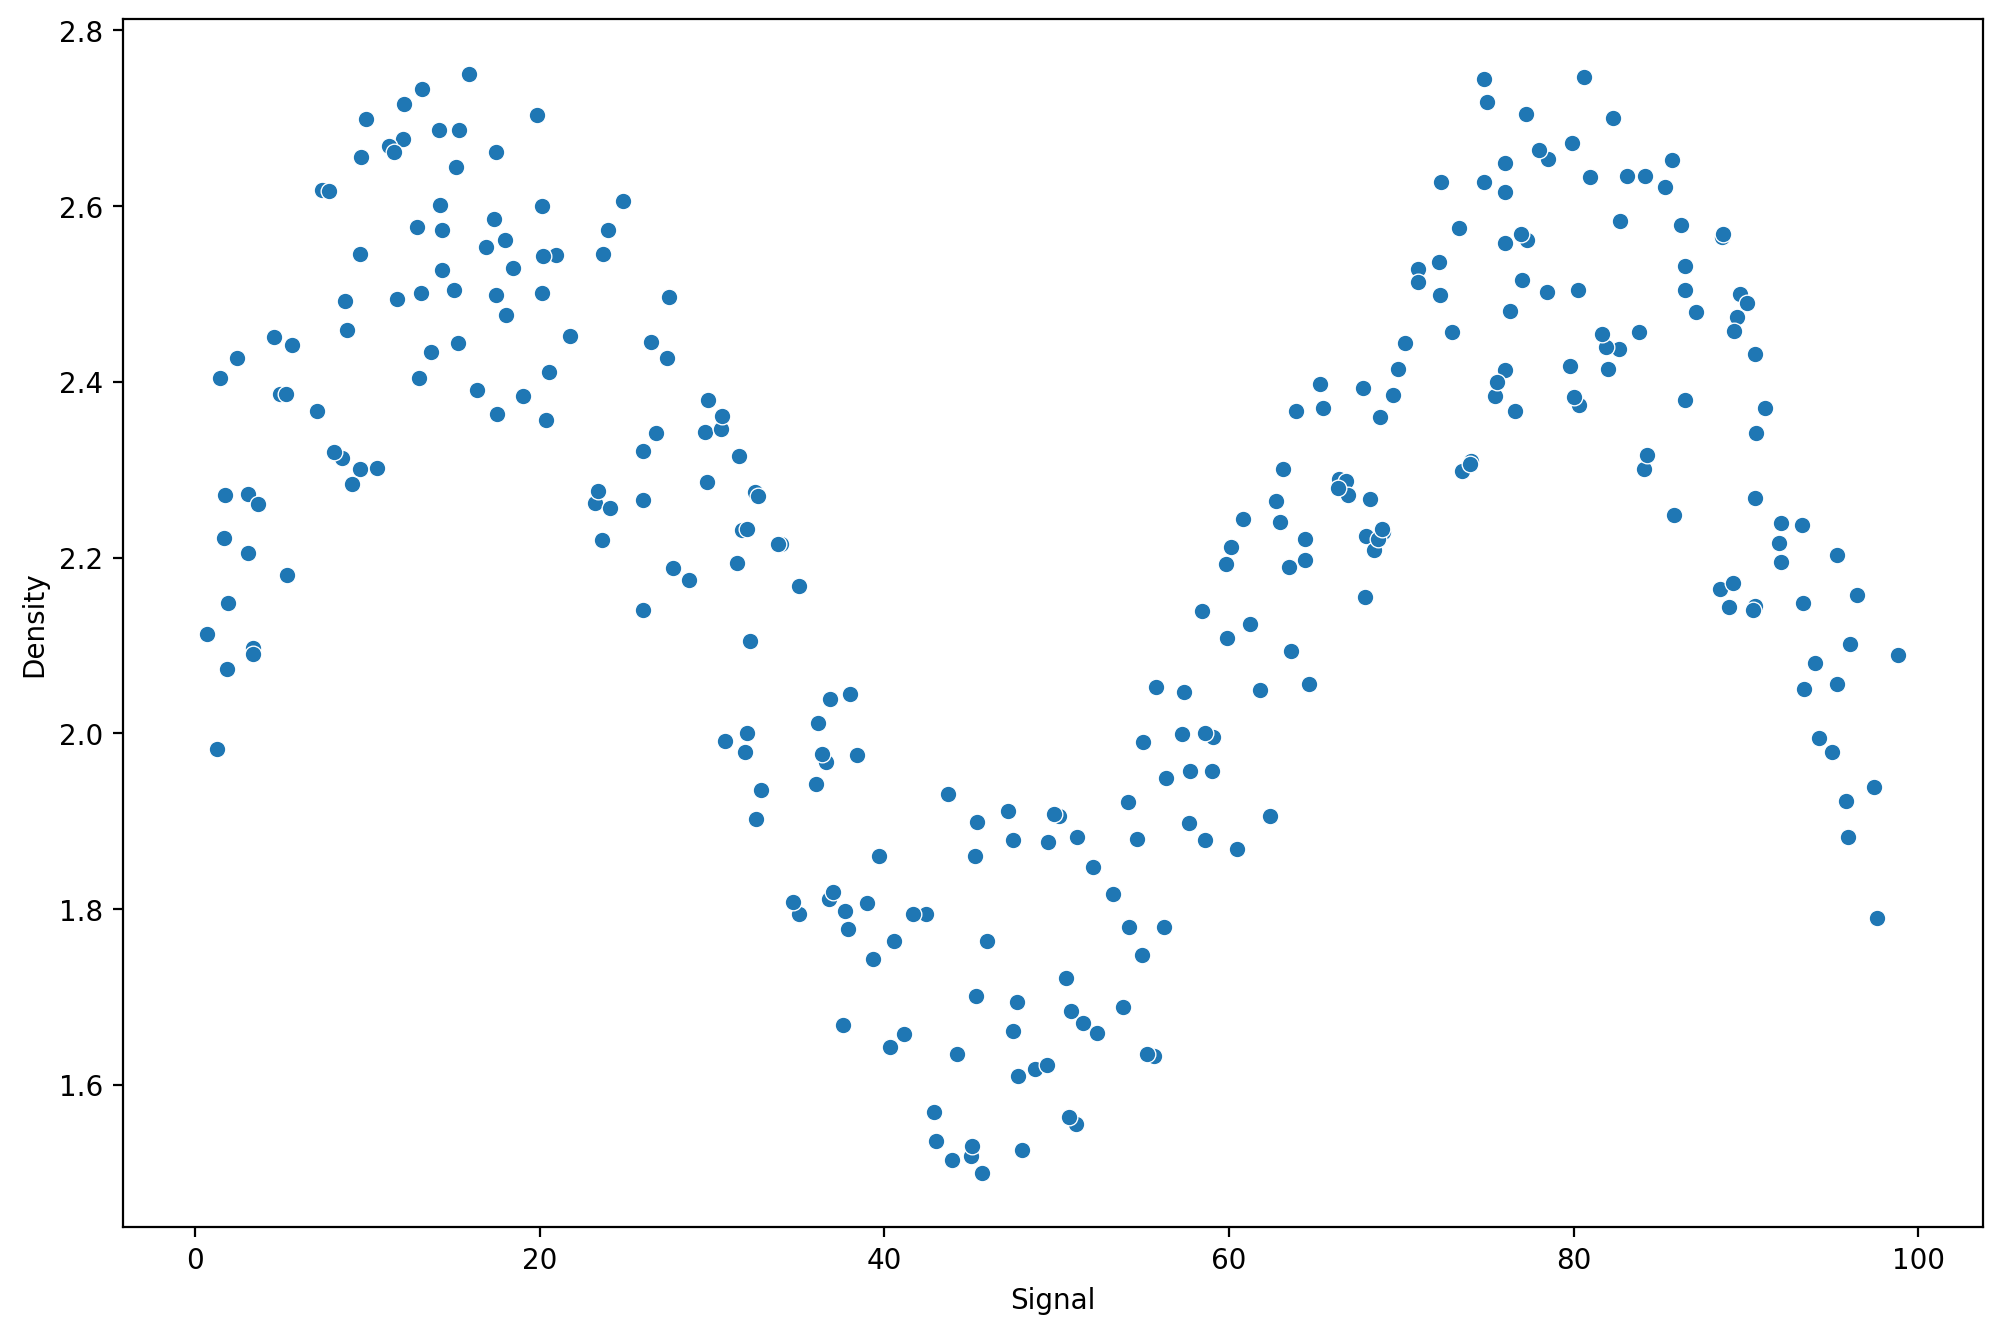

In [6]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [7]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_model = LinearRegression()

In [12]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
lr_preds = lr_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [16]:
signal_range = np.arange(0,100)

In [17]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

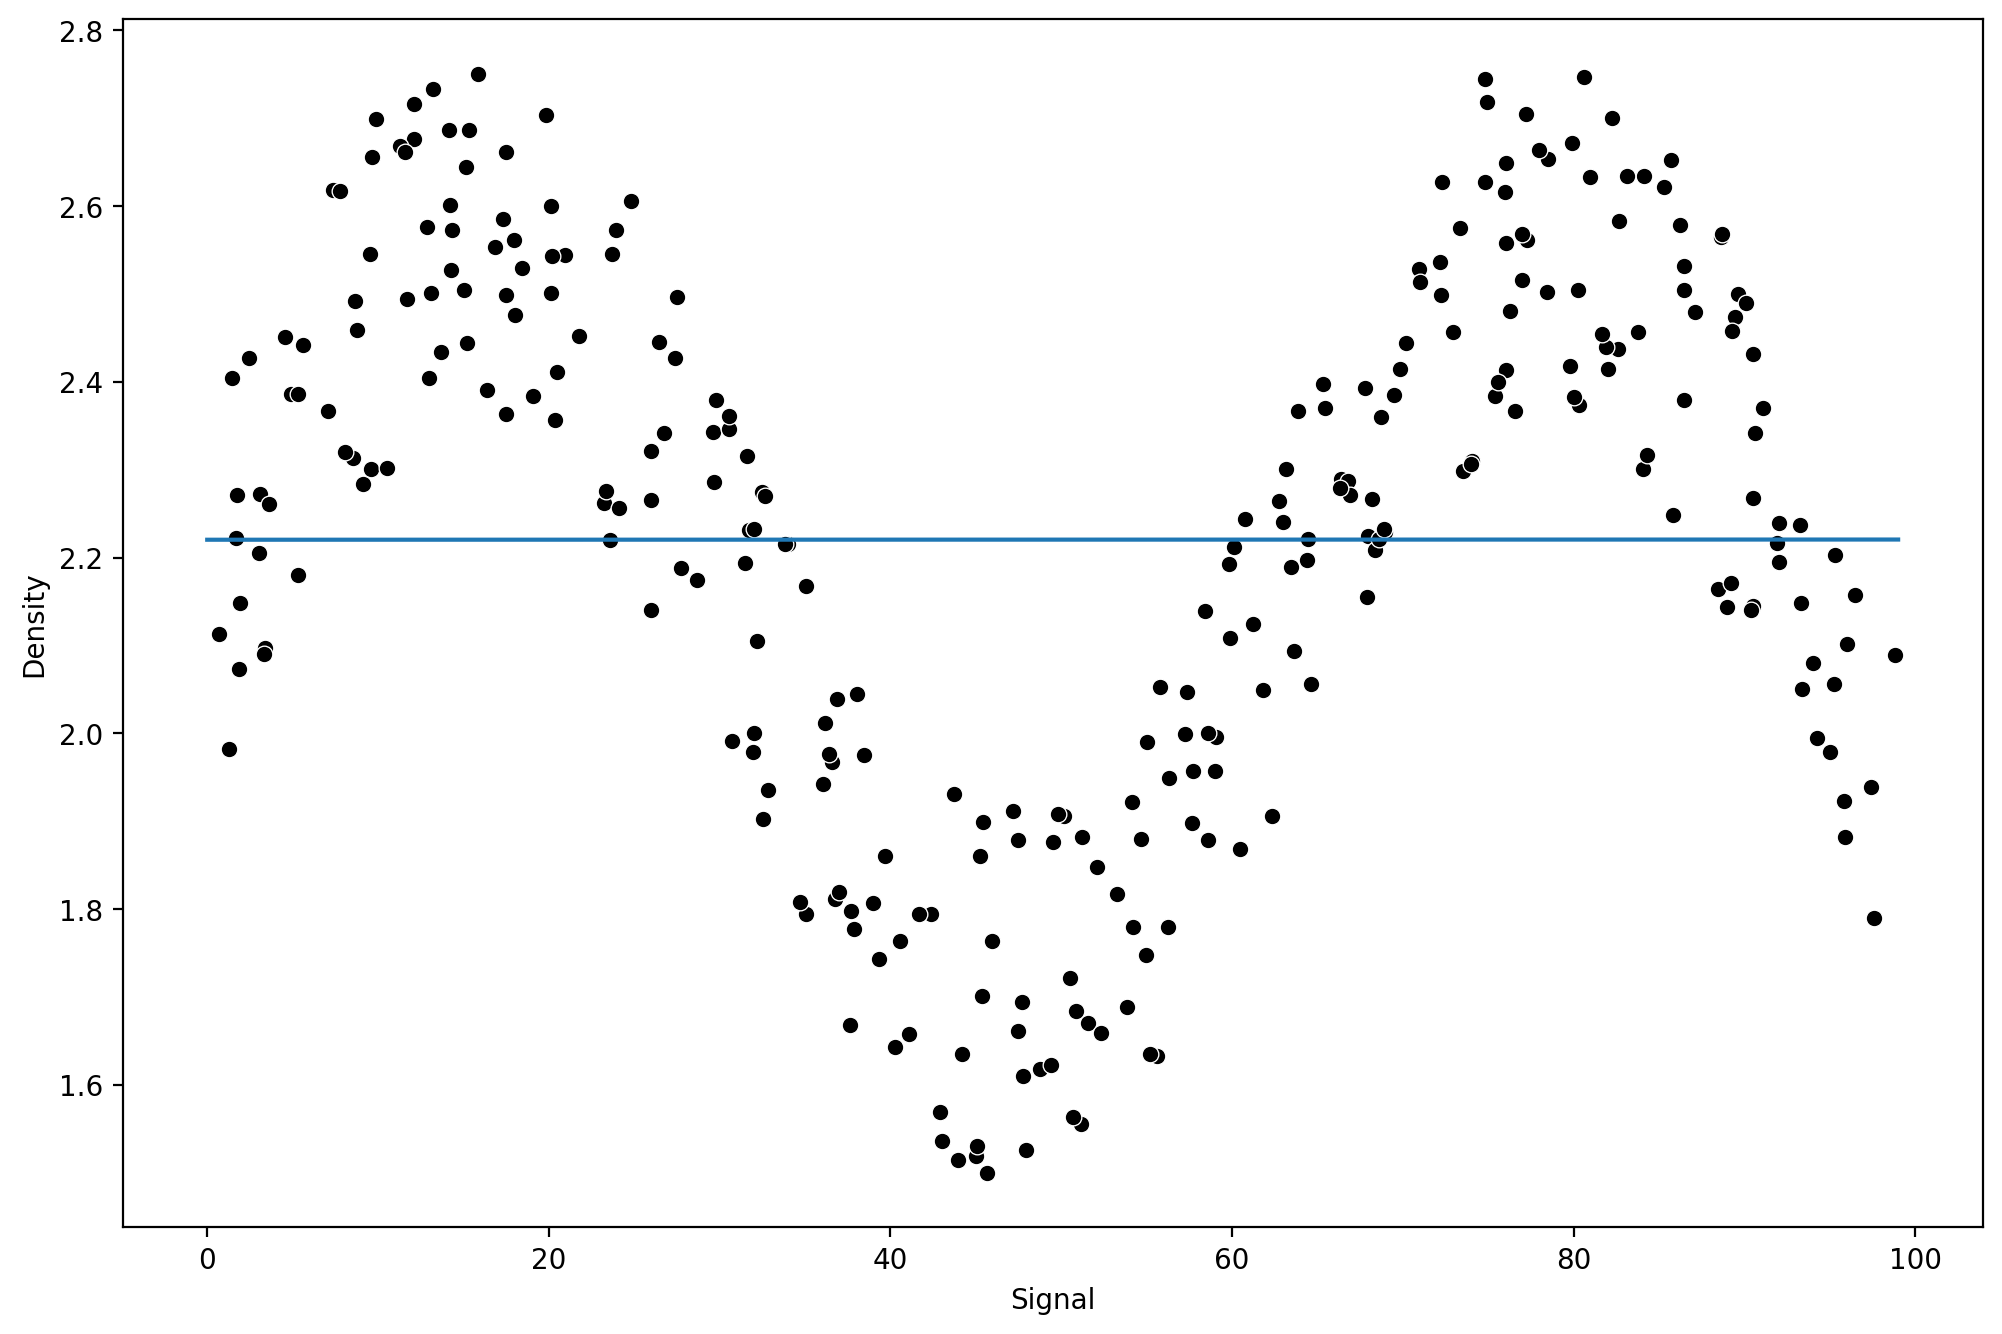

In [18]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

# Polynomial Regression

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

above function helps us to run model with diffirent algorithms

RMSE : 0.2570051996584629


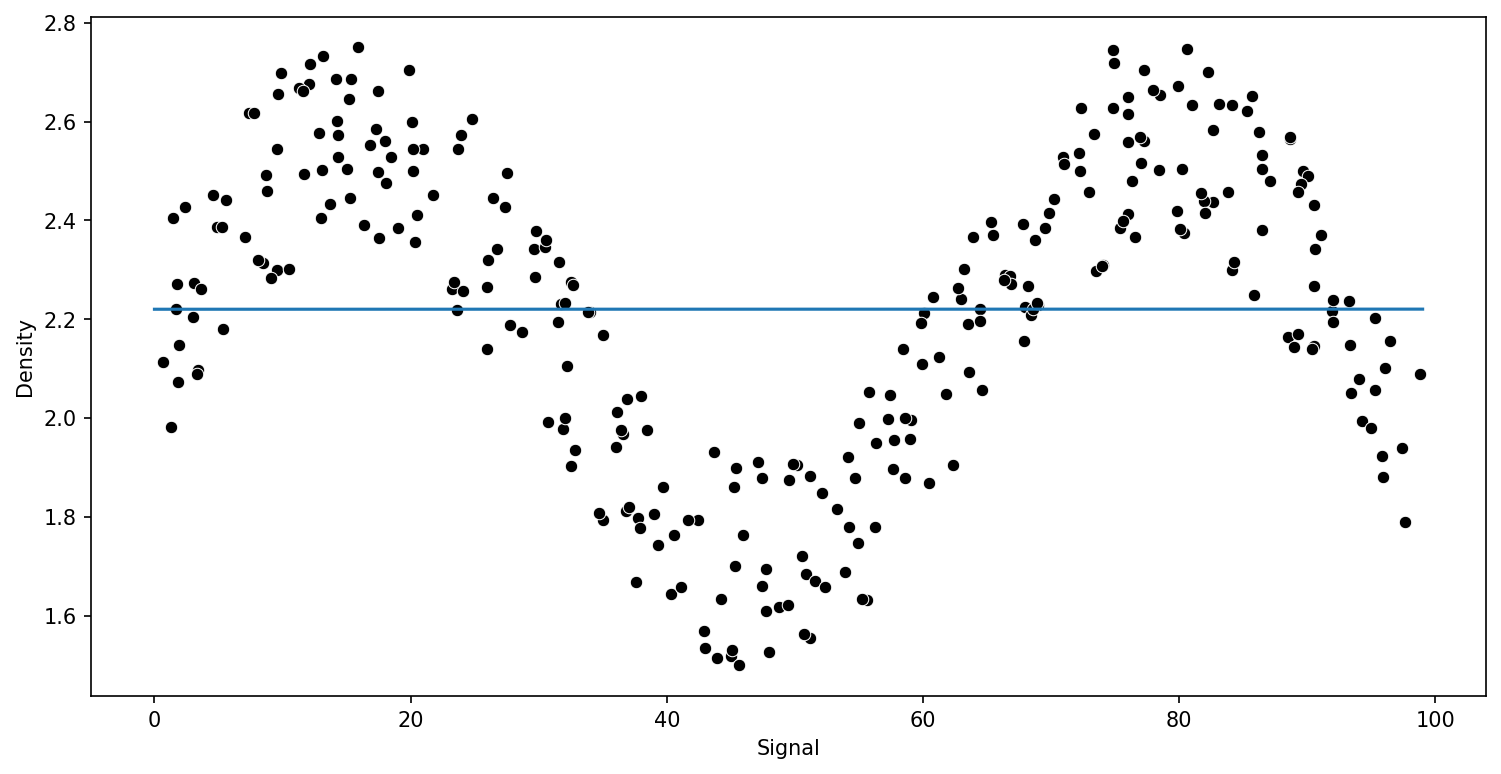

In [21]:
run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [23]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

In [24]:
#pipe.fit(X_train,y_train)

RMSE : 0.28173095637255463


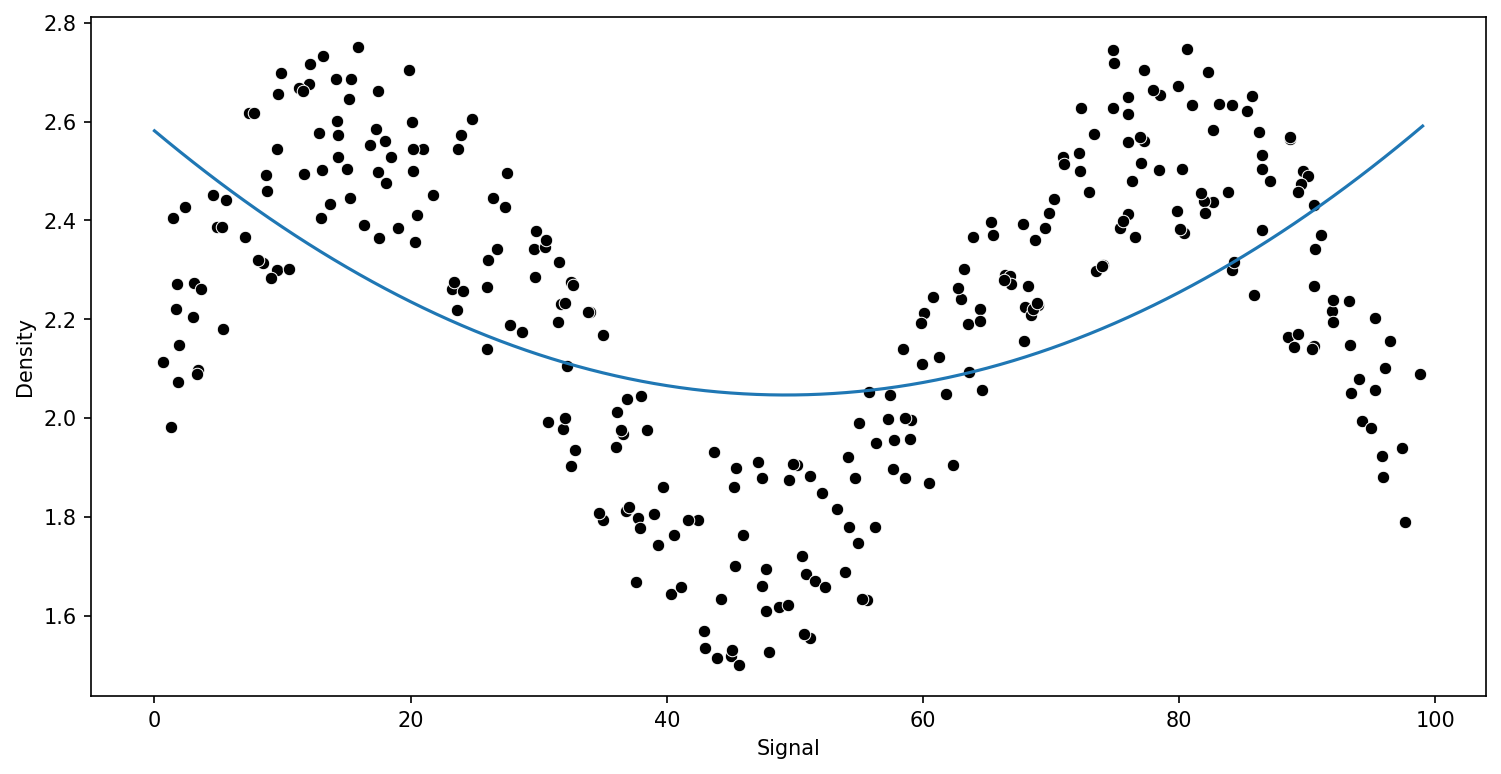

In [25]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [26]:
pipe10=make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE : 0.13807383449323551


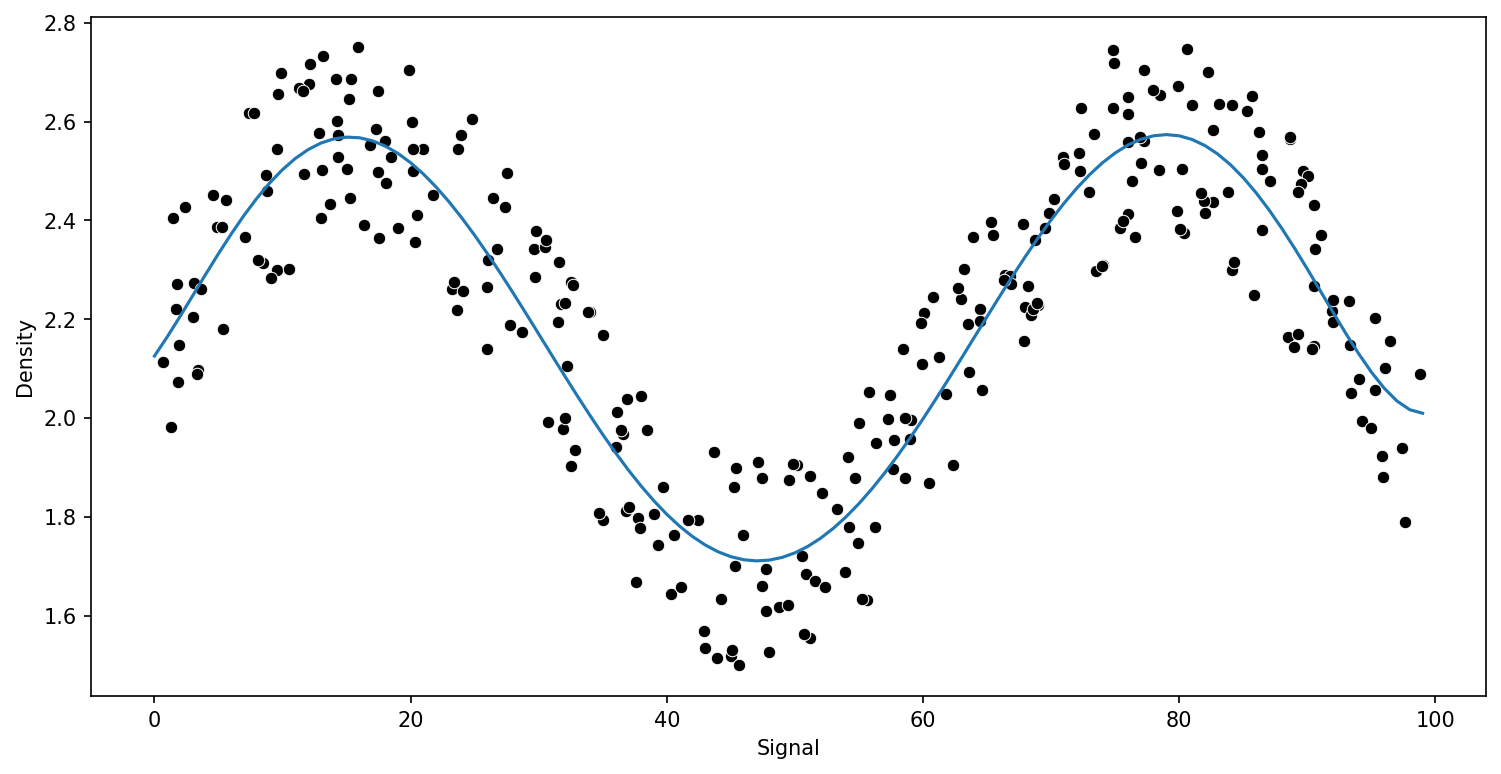

In [27]:
run_model(pipe10,X_train,y_train,X_test,y_test)

In [28]:
pipe10=make_pipeline(PolynomialFeatures(degree=7),LinearRegression())

RMSE : 0.1361534844595092


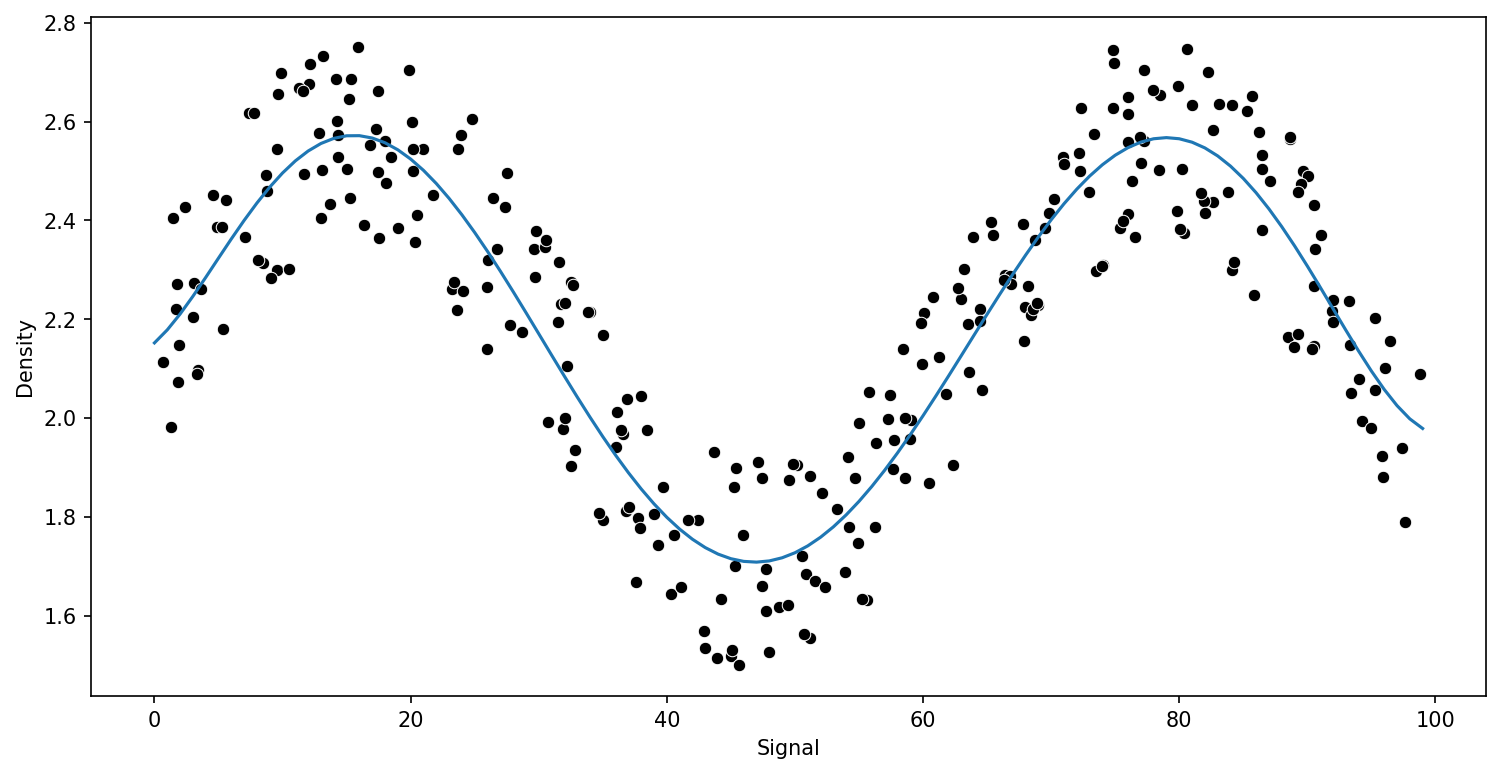

In [29]:
run_model(pipe10,X_train,y_train,X_test,y_test)

## KNN Regression

In [30]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


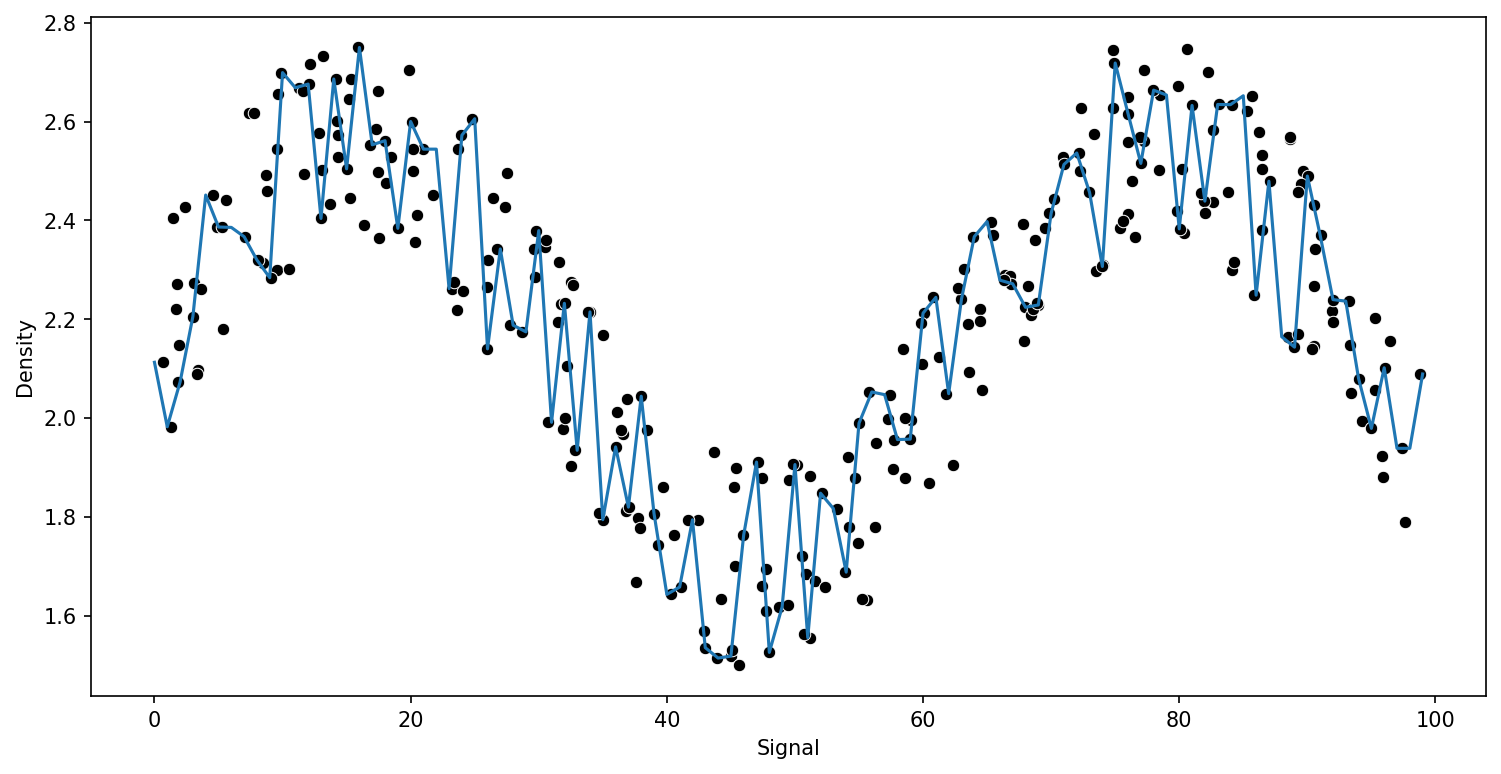

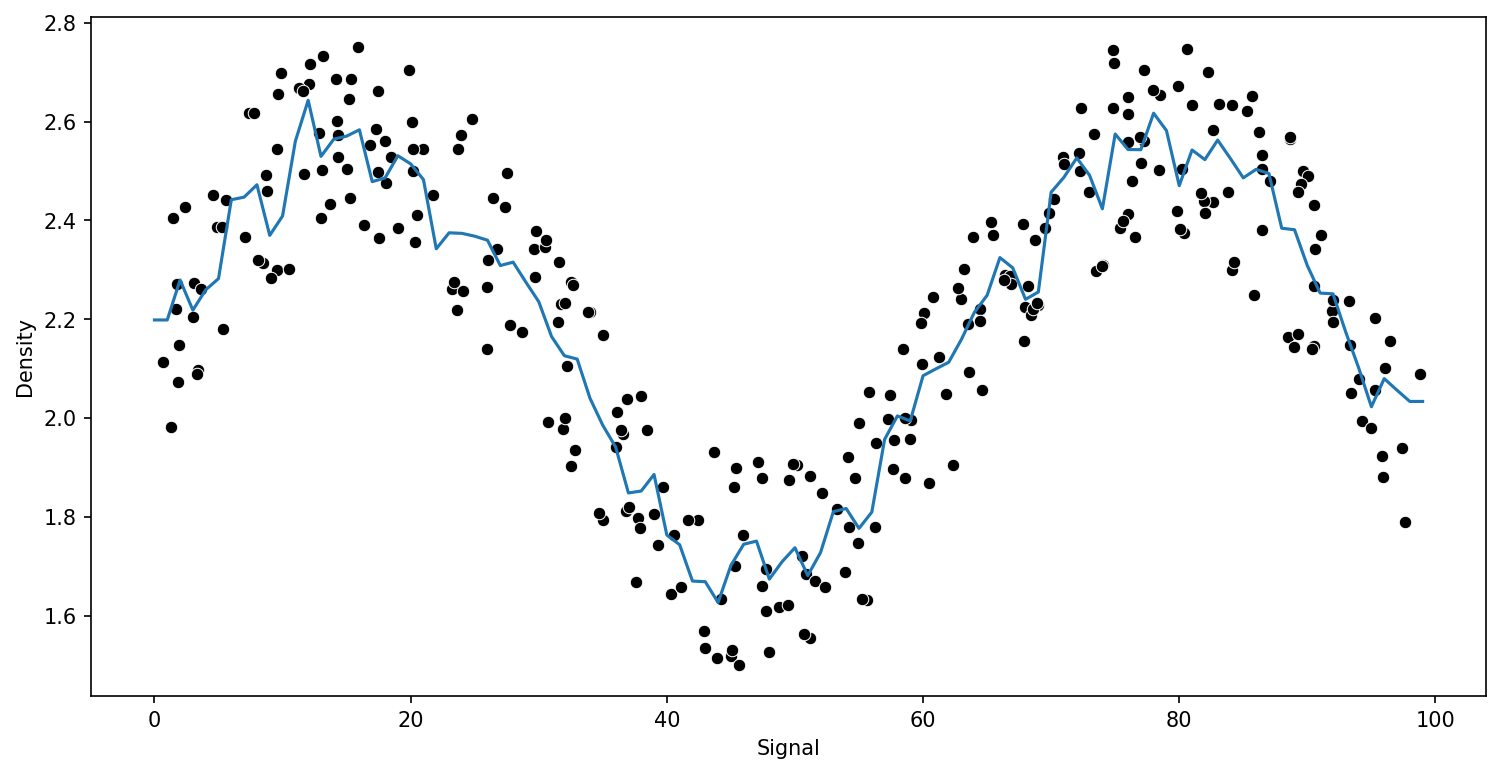

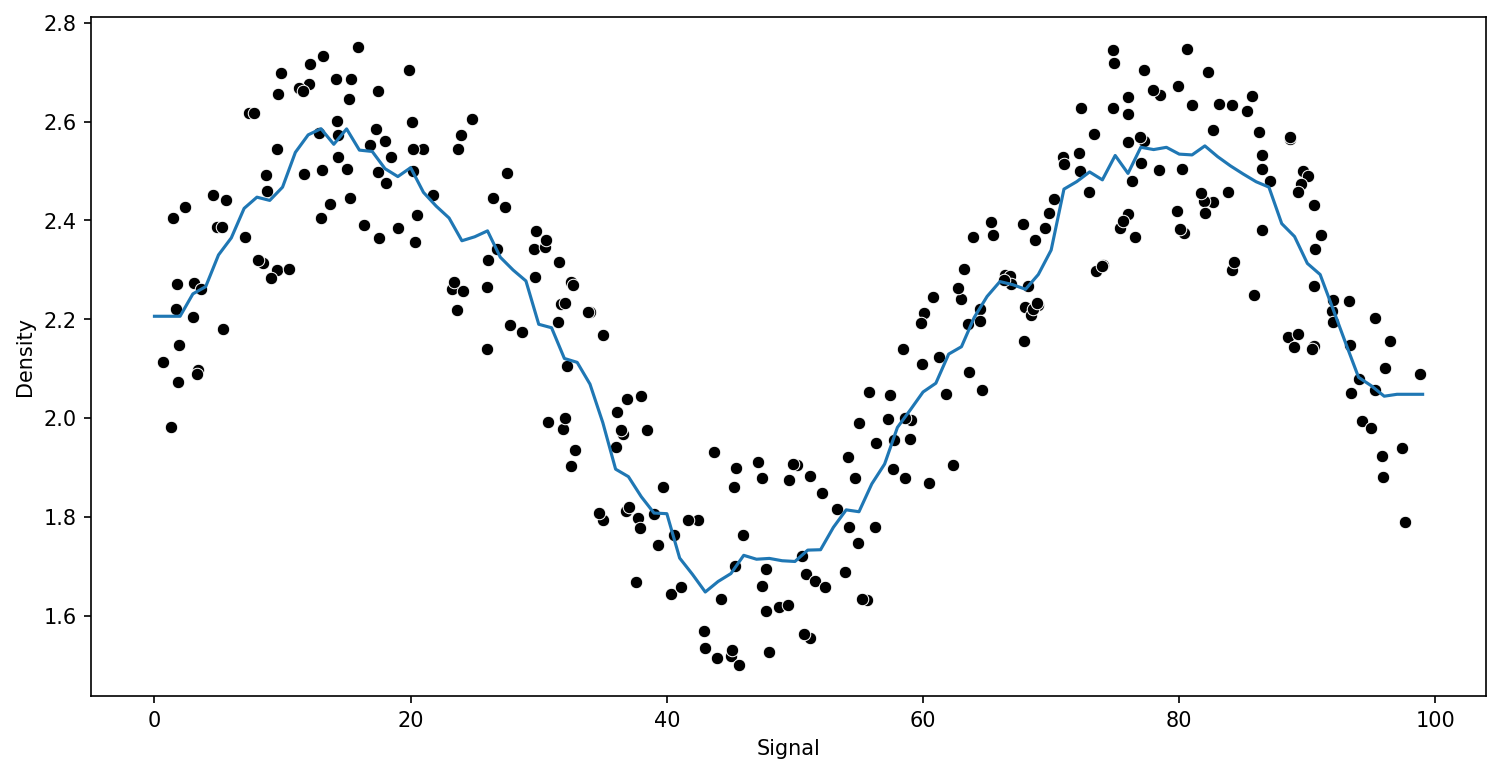

In [33]:
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Decision Tree Regression

In [36]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


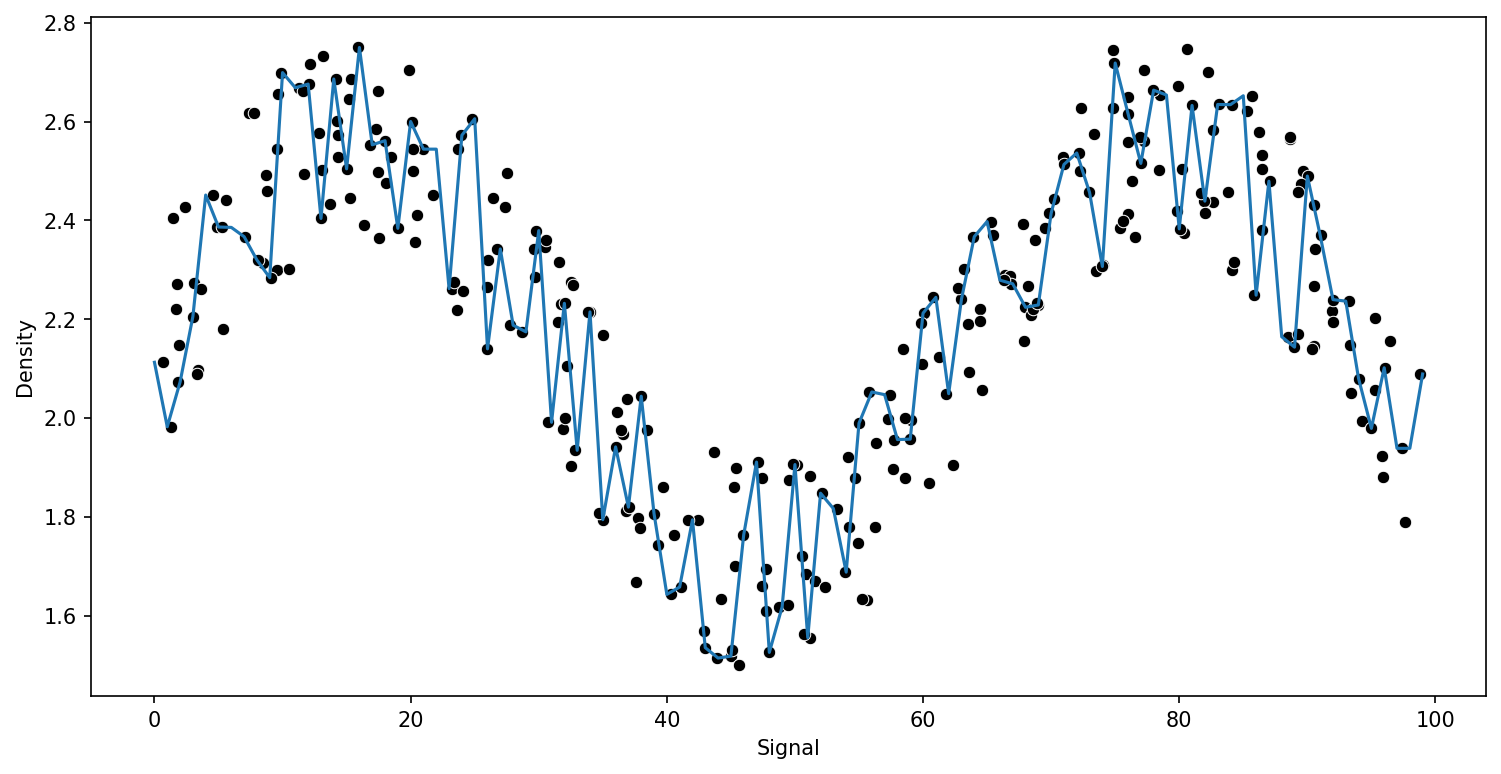

In [37]:
dt_model = DecisionTreeRegressor()

run_model(dt_model,X_train,y_train,X_test,y_test)

## Support Vector Regression

In [38]:
from sklearn.svm import SVR

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [41]:
grid = GridSearchCV(svr,param_grid)

RMSE : 0.12646999302046696


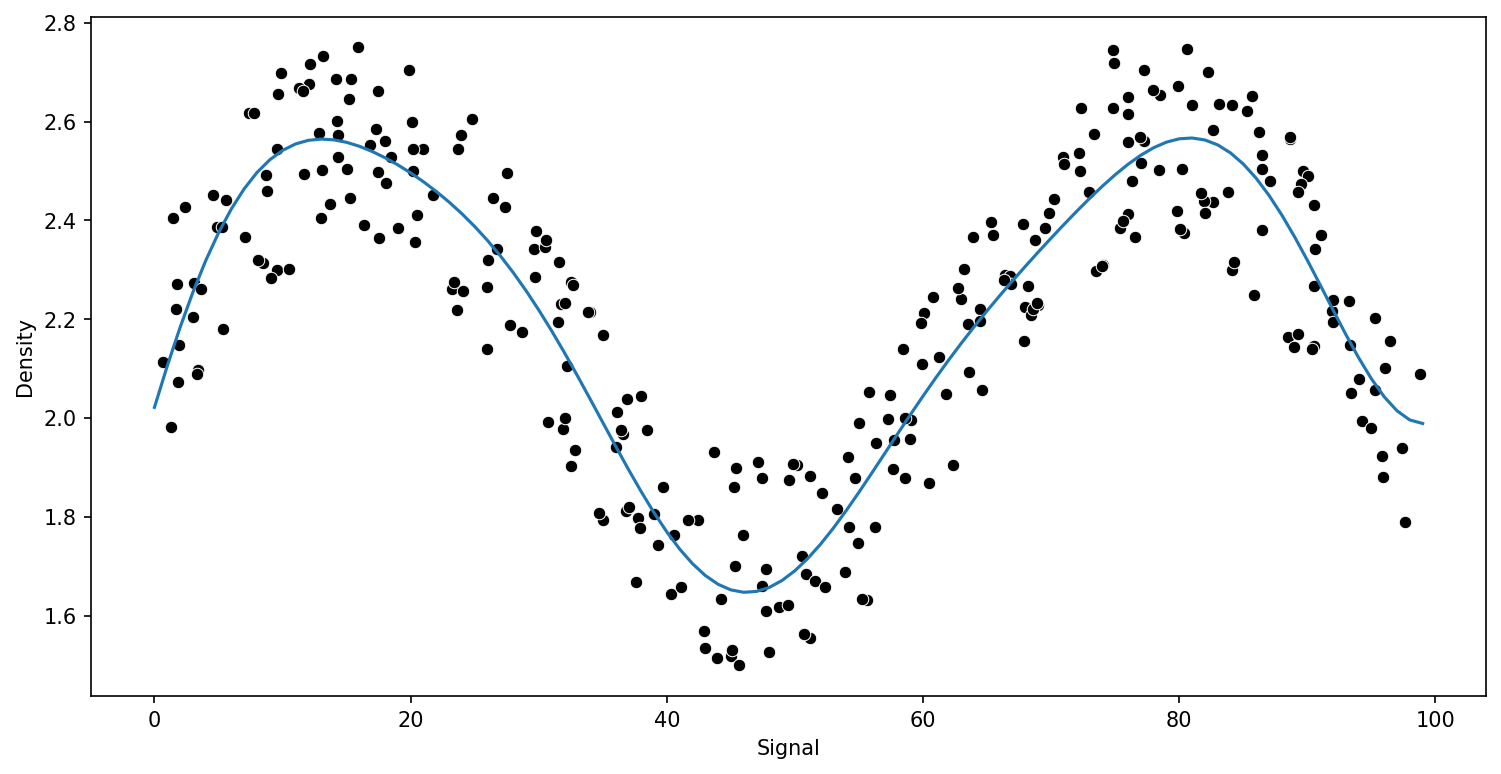

In [42]:
run_model(grid,X_train,y_train,X_test,y_test)

## Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.12469918570704705
RMSE : 0.13900072989771664
RMSE : 0.13998047346079623


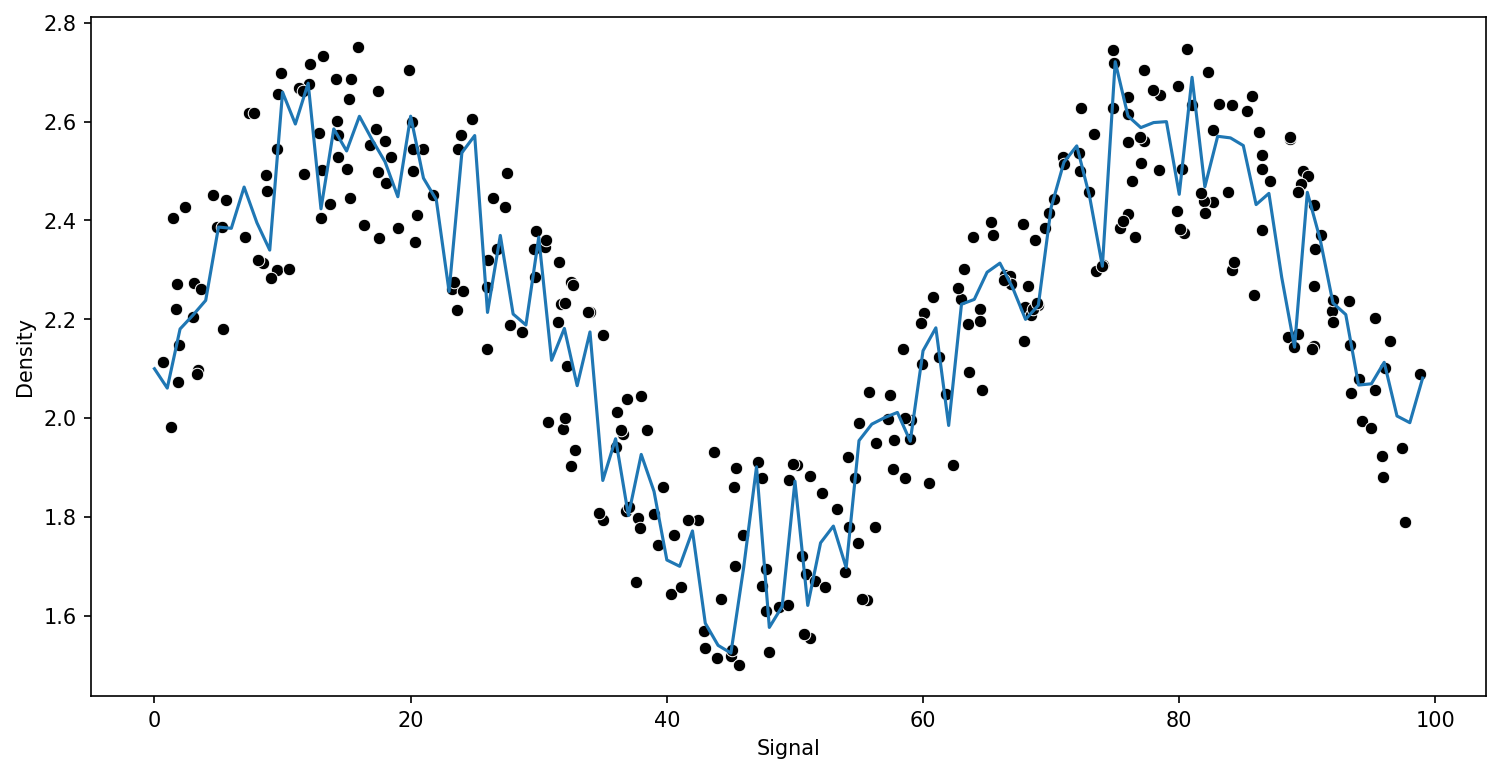

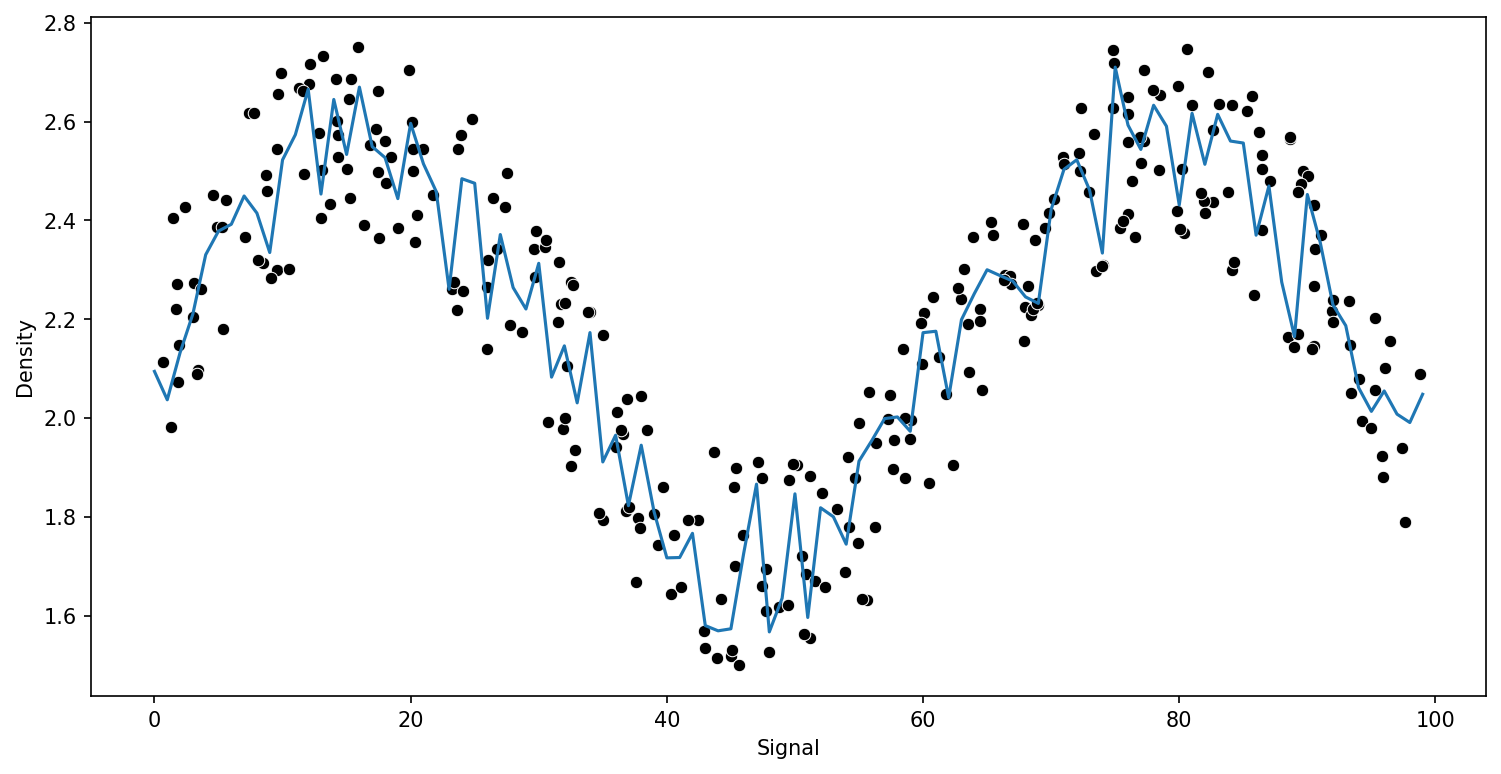

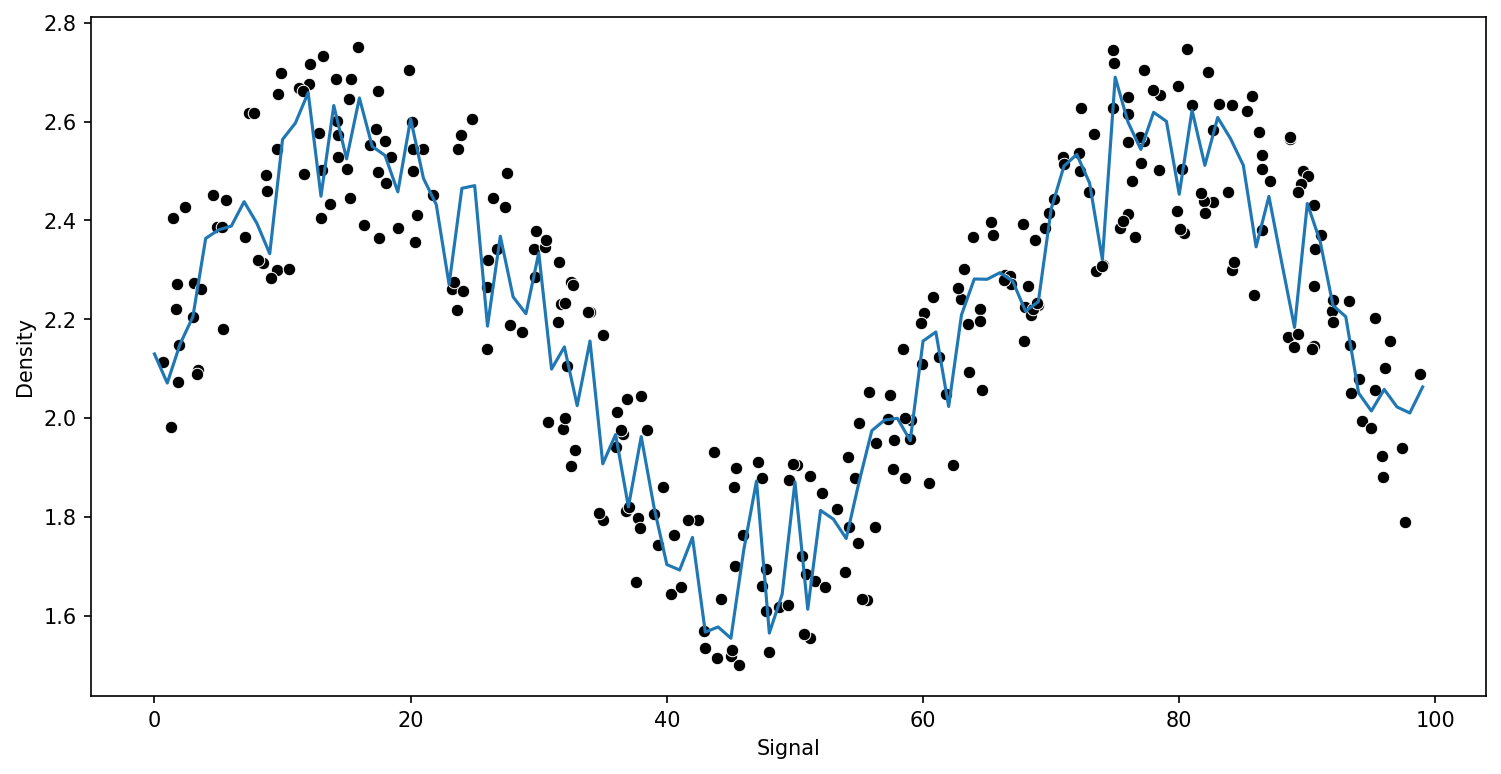

In [44]:
trees = [10,50,100]
for n in trees:
    
    rf_model = RandomForestRegressor(n_estimators=n)
    
    run_model(rf_model,X_train,y_train,X_test,y_test)

## Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE : 0.13277855732740926


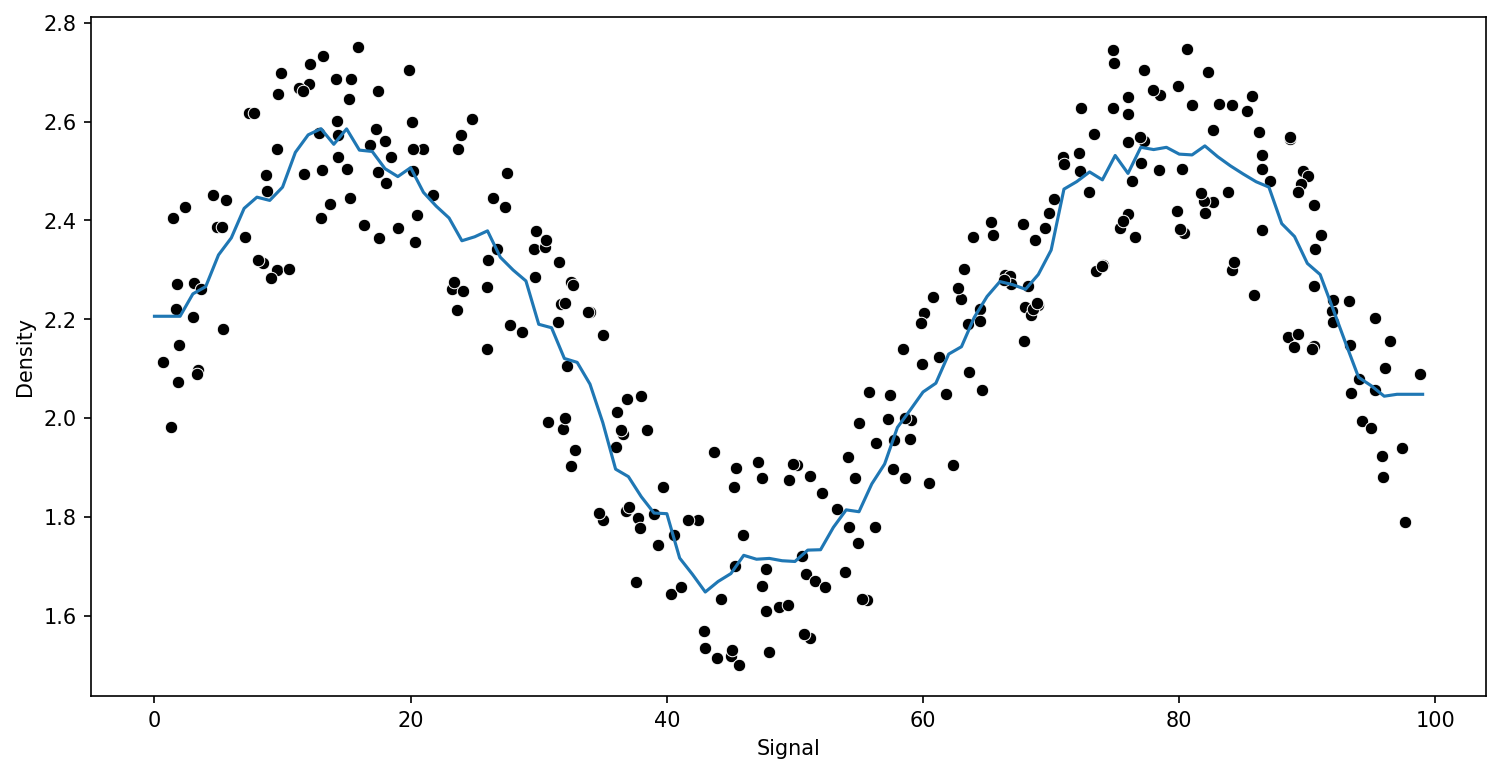

In [46]:
grb_model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost Boosting

In [48]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13441998000782085


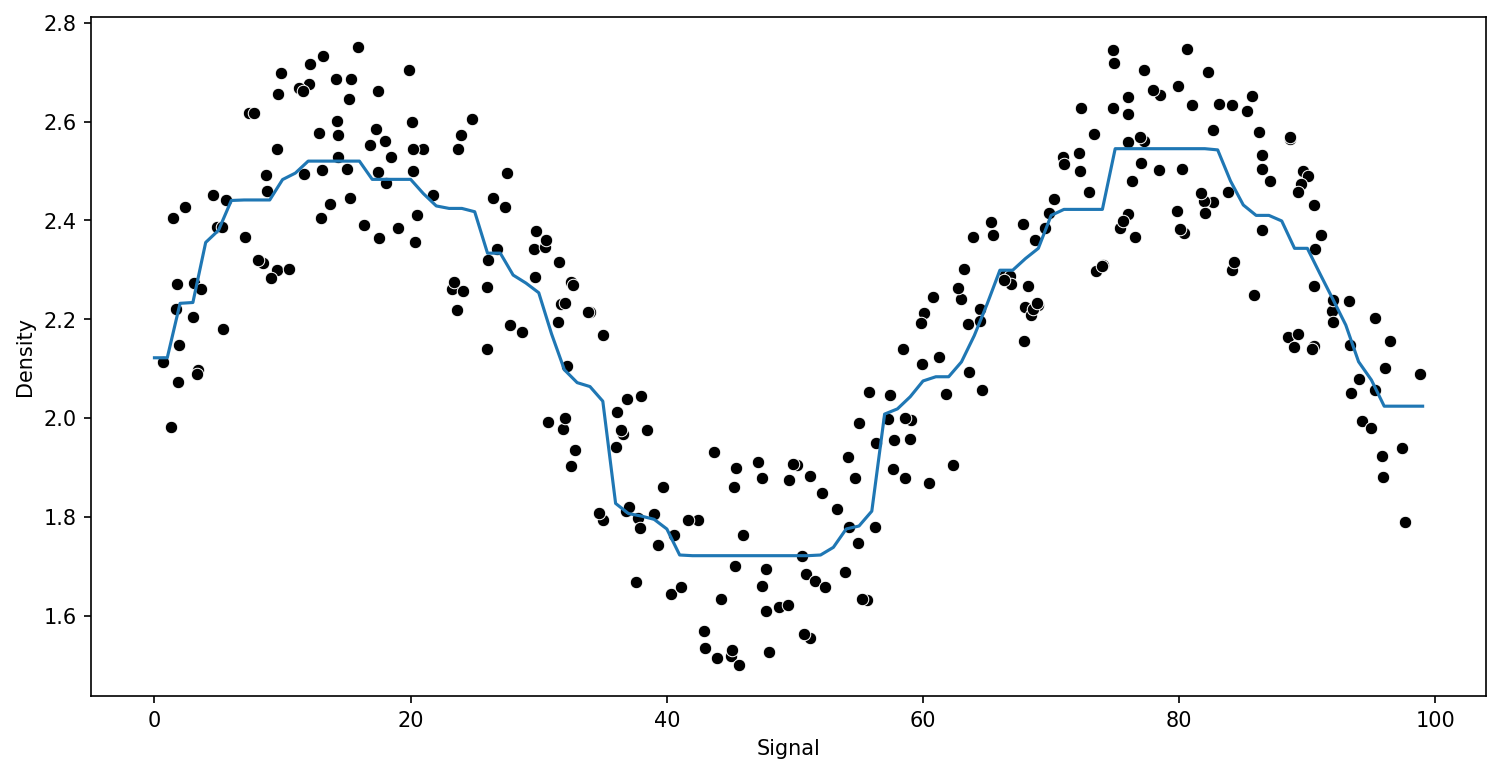

In [50]:
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)